In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Leer el archivo CSV
datos = pd.read_csv('Actividad 1 Distribuciones.csv')

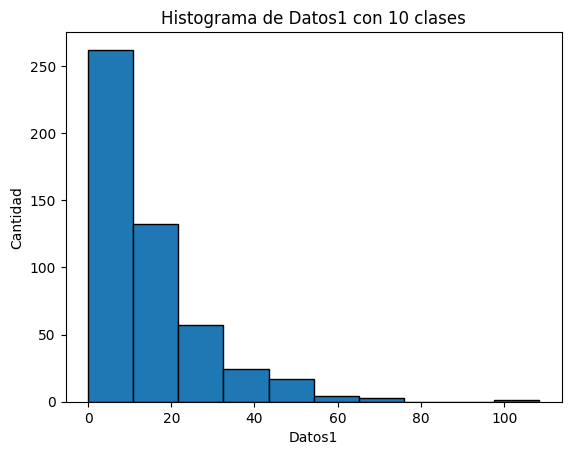

In [10]:
#INCISO A: HISTOGRAMA / DATOS 1

# Elegir una columna para el histograma
columna_seleccionada = 'Datos1'

# Extraer los datos de la columna seleccionada
valores = datos[columna_seleccionada]

# Calcular el número de clases usando la regla de Sturges
muestras = 500
clases = int(np.ceil(np.log2(muestras) + 1))

# Crear el histograma
plt.hist(valores, bins=clases, edgecolor='black')
plt.xlabel(columna_seleccionada)
plt.ylabel('Cantidad')
plt.title(f'Histograma de {columna_seleccionada} con {clases} clases')
plt.show()


In [13]:
#INCISO A: HISTOGRAMA / DATOS 2

# Elegir una columna para el histograma
columna_seleccionada = 'Datos2'

# Extraer los datos de la columna seleccionada
valores = datos[columna_seleccionada]

# Calcular el número de clases usando la regla de Sturges
muestras = 750
clases = int(np.ceil(np.log2(muestras) + 1))

# Crear el histograma
plt.hist(valores, bins=clases, edgecolor='black')
plt.xlabel(columna_seleccionada)
plt.ylabel('Cantidad')
plt.title(f'Histograma de {columna_seleccionada} con {clases} clases')
plt.show()

In [14]:
#INCISO A: HISTOGRAMA / DATOS 3

# Elegir una columna para el histograma
columna_seleccionada = 'Datos3'

# Extraer los datos de la columna seleccionada
valores = datos[columna_seleccionada]

# Calcular el número de clases usando la regla de Sturges
muestras = 300
clases = int(np.ceil(np.log2(muestras) + 1))

# Crear el histograma
plt.hist(valores, bins=clases, edgecolor='black')
plt.xlabel(columna_seleccionada)
plt.ylabel('Cantidad')
plt.title(f'Histograma de {columna_seleccionada} con {clases} clases')
plt.show()

In [16]:
#INCISO A: HISTOGRAMA / REGLA DE STURGES

# Leer el archivo CSV
datos = pd.read_csv('Actividad 1 Distribuciones.csv')
columna_analizar = 'Datos2'

def regla_Sturges(columna, tamano_muestra):
    # Extraer los datos de la columna seleccionada
    valores_columna = datos[columna]

    # Calcular el número de clases usando la regla de Sturges
    num_clases = int(np.ceil(np.log2(tamano_muestra) + 1))
    return num_clases

print("Regla de Sturges para Datos1:", regla_Sturges('Datos1', 500),
      "  Datos2:", regla_Sturges('Datos2', 750),
      "  Datos3:", regla_Sturges('Datos3', 300))

Regla de Sturges para Datos1: 10   Datos2: 11   Datos3: 10


In [18]:
#INCISO B: COMPARACIÓN CON REGLA DE SCOTT

def regla_Scott(columna, tamano_muestra):

    # Extraer los datos de la columna seleccionada
    valores_columna = datos[columna]

    # Calcular el rango de los datos
    rango_valores = valores_columna.max() - valores_columna.min()

    # Calcular el número de clases usando la regla de Scott
    ancho_intervalo = 3.5 * valores_columna.std() / (tamano_muestra ** (1 / 3))
    num_clases = int(np.ceil(rango_valores / ancho_intervalo))
    return num_clases

print("Regla de Scott para Datos1:", regla_Scott('Datos1', 500),
      "  Datos2:", regla_Scott('Datos2', 750),
      "  Datos3:", regla_Scott('Datos3', 300))

Regla de Scott para Datos1: 18   Datos2: 18   Datos3: 12


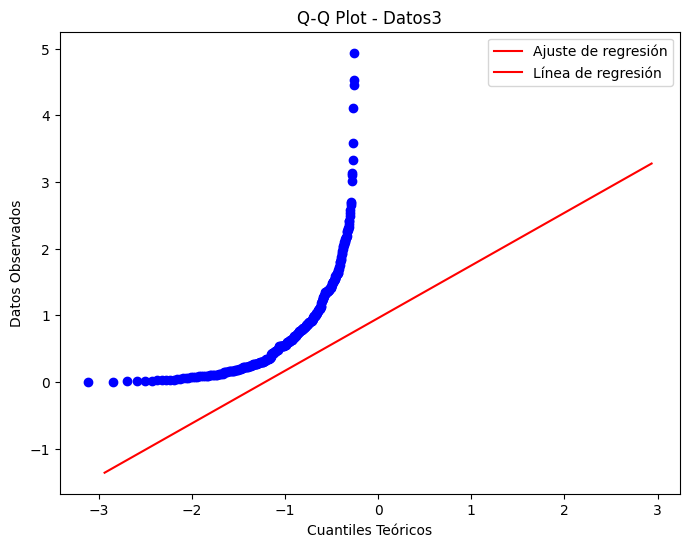

In [20]:
#INCISO C: GRÁFICO Q-Q 

# Leer el archivo CSV
df_datos = pd.read_csv('Actividad 1 Distribuciones.csv')

def grafico_QQPlot(nombre_columna, tamano_muestra):

    # Extraer los datos de la columna seleccionada
    datos_columna = df_datos[nombre_columna]

    # Generar el gráfico Q-Q
    fig, ax = plt.subplots(figsize=(8, 6))
    stats.probplot(datos_columna, dist="norm", plot=ax)

    # Ajustar una línea de regresión a los puntos del gráfico Q-Q
    cuantiles_teoricos = stats.norm.ppf((np.arange(tamano_muestra) + 0.5) / tamano_muestra)
    datos_ordenados = np.sort(datos_columna)
    datos_ordenados = datos_ordenados[0:tamano_muestra]
    pendiente, intercepto = np.polyfit(cuantiles_teoricos, datos_ordenados, 1)

    # Añadir la línea de regresión al gráfico
    ax.get_lines()[1].set_label('Ajuste de regresión')
    ax.plot(cuantiles_teoricos, pendiente * cuantiles_teoricos + intercepto, 'r-', label='Línea de regresión')

    ax.set_title(f'Q-Q Plot - {nombre_columna}')
    ax.set_xlabel('Cuantiles Teóricos')
    ax.set_ylabel('Datos Observados')
    ax.legend()

    # Mostrar el gráfico
    plt.show()

# Llamada a la función
grafico_QQPlot('Datos1', 500)
grafico_QQPlot('Datos2', 750)
grafico_QQPlot('Datos3', 300)